<a href="https://colab.research.google.com/github/uayoag/libmana/blob/main/Fuel_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNDERSTAND THE GIVEN VARIABLES**
*   **Year**: Indicates the year of manufacture for the vehicles in the dataset
*   **MAKE**: Represents the brand or manufacturer of the vehicle, such as Acura, Audi, BMW, etc.
*   **MODEL**: Specifies the specific model of the vehicle produced by the manufacturer, for example, A4, 323Ci, NSX,
*   **VEHICLE CLASS**: Categorizes the vehicles into different classes based on their size and intended use, such as compact, mid-size,
*   **ENGINE SIZE**: Denotes the volume of the engine in liters, providing information about the capacity of the vehicle's power plant.
*   **COEMISSIONS**: Provides ranges representing the quantity of carbon dioxide emitted by the vehicle, helping to evaluate its environmental
*  **FUEL CONSUMPTION**: Presents ranges indicating the amount of fuel consumed by the vehicle over a given distance, providing
*   **FUEL**: Identifies the type of fuel used by the vehicle, which could be represented by codes such as "X" or "Z", or unspecified "Other" categories.
*   **TRANSMISSION**: Specifies the type of transmission system used in the vehicle, such as automatic (A4, AS5) or manual (M5, M6).
*   **CYLINDERS**: Indicates the number of cylinders present in the vehicle's engine, providing insights into its design and performance characteristics.

# Import Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistics
from statistics import mean, stdev
from scipy.stats import ttest_1samp, norm, t
import statsmodels.stats.api as sms
from statsmodels.stats.weightstats import ztest, DescrStatsW
import statsmodels.api as sm

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load Data
data = pd.read_csv('drive/MyDrive/stat_project/FuelConsumption.csv')

# Exploratory Data Analysis


In [ ]:
# Print Data
print(data)

     Year   MAKE           MODEL             VEHICLE CLASS  ENGINE SIZE  \
0    2000  ACURA           1.6EL                   COMPACT          1.6   
1    2000  ACURA           1.6EL                   COMPACT          1.6   
2    2000  ACURA           3.2TL                  MID-SIZE          3.2   
3    2000  ACURA           3.5RL                  MID-SIZE          3.5   
4    2000  ACURA         INTEGRA                SUBCOMPACT          1.8   
..    ...    ...             ...                       ...          ...   
634  2000  VOLVO   V70 AWD TURBO  STATION WAGON - MID-SIZE          2.4   
635  2000  VOLVO   V70 GLT TURBO  STATION WAGON - MID-SIZE          2.4   
636  2000  VOLVO    V70 T5 TURBO  STATION WAGON - MID-SIZE          2.3   
637  2000  VOLVO    V70 T5 TURBO  STATION WAGON - MID-SIZE          2.3   
638  2000  VOLVO  V70R AWD TURBO  STATION WAGON - MID-SIZE          2.4   

     CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
0            4           A4    X

In [ ]:
# Print the first five rows of FuelConsumption
data.head(1000)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [ ]:
# @title
# Check what are the variables here
data.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [ ]:
# Remove duplicate rows
print(data.drop_duplicates())
#Reset index
data.reset_index(drop = True, inplace = True)

     Year   MAKE           MODEL             VEHICLE CLASS  ENGINE SIZE  \
0    2000  ACURA           1.6EL                   COMPACT          1.6   
1    2000  ACURA           1.6EL                   COMPACT          1.6   
2    2000  ACURA           3.2TL                  MID-SIZE          3.2   
3    2000  ACURA           3.5RL                  MID-SIZE          3.5   
4    2000  ACURA         INTEGRA                SUBCOMPACT          1.8   
..    ...    ...             ...                       ...          ...   
634  2000  VOLVO   V70 AWD TURBO  STATION WAGON - MID-SIZE          2.4   
635  2000  VOLVO   V70 GLT TURBO  STATION WAGON - MID-SIZE          2.4   
636  2000  VOLVO    V70 T5 TURBO  STATION WAGON - MID-SIZE          2.3   
637  2000  VOLVO    V70 T5 TURBO  STATION WAGON - MID-SIZE          2.3   
638  2000  VOLVO  V70R AWD TURBO  STATION WAGON - MID-SIZE          2.4   

     CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
0            4           A4    X

In [ ]:
# Check for missing values in each column
print(data.isnull().sum())

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64


In [ ]:
# @title
# Print data
print(data)

     Year   MAKE           MODEL             VEHICLE CLASS  ENGINE SIZE  \
0    2000  ACURA           1.6EL                   COMPACT          1.6   
1    2000  ACURA           1.6EL                   COMPACT          1.6   
2    2000  ACURA           3.2TL                  MID-SIZE          3.2   
3    2000  ACURA           3.5RL                  MID-SIZE          3.5   
4    2000  ACURA         INTEGRA                SUBCOMPACT          1.8   
..    ...    ...             ...                       ...          ...   
634  2000  VOLVO   V70 AWD TURBO  STATION WAGON - MID-SIZE          2.4   
635  2000  VOLVO   V70 GLT TURBO  STATION WAGON - MID-SIZE          2.4   
636  2000  VOLVO    V70 T5 TURBO  STATION WAGON - MID-SIZE          2.3   
637  2000  VOLVO    V70 T5 TURBO  STATION WAGON - MID-SIZE          2.3   
638  2000  VOLVO  V70R AWD TURBO  STATION WAGON - MID-SIZE          2.4   

     CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
0            4           A4    X

In [ ]:
# # Convert columns to numeric type
# data['MAKE'] = pd.to_numeric(data['MAKE'])
# data['MODEL'] = pd.to_numeric(data['MODEL'])
# data['VEHICLE'] = pd.to_numeric(data['VEHICLE CLASS'])
# data['ENGINE SIZE'] = pd.to_numeric(data['ENGINE SIZE'])
# data['CYLINDERS'] = pd.to_numeric(data['CYLINDERS'])
# data['TRANSMISSION'] = pd.to_numeric(data['TRANSMISSION'])
# data['FUEL CONSUMPTION'] = pd.to_numeric(data['FUEL CONSUMPTION'])
# data['COEMISSIONS'] = pd.to_numeric(data['COEMISSIONS'])
# data['FUEL'] = pd.to_numeric(data['FUEL'])

In [ ]:
# Check Dataset columns changed and null values, last_review column removed
data.sample(5)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
247,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.2,6,A4,X,17.3,359
286,2000,GMC,C2500 SIERRA,PICKUP TRUCK - STANDARD,5.3,8,A4,X,17.9,373
499,2000,SATURN,LS,MID-SIZE,2.2,4,A4,X,11.9,239
161,2000,DAEWOO,NUBIRA WAGON,STATION WAGON - SMALL,2.0,4,A4,X,12.0,239
588,2000,VOLKSWAGEN,GOLF,COMPACT,2.0,4,A4,X,11.9,244


In [ ]:
# Print a summary of non-missing values and data types in the FuelConsumption DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB
None


**Check Unique Value**

In [ ]:
# Check Unique Value for variables
print(data.nunique())

Year                  1
MAKE                 36
MODEL               328
VEHICLE CLASS        14
ENGINE SIZE          40
CYLINDERS             7
TRANSMISSION          8
FUEL                  5
FUEL CONSUMPTION    124
COEMISSIONS         116
dtype: int64


**Describe the Dataset**

In [ ]:
# Print summary statistics for numerical columns in FuelConsumption
print(data.describe())

         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS 
count   639.0   639.000000  639.000000        639.000000    639.000000
mean   2000.0     3.265728    5.805947         14.713615    296.809077
std       0.0     1.231012    1.625588          3.307044     65.504178
min    2000.0     1.000000    3.000000          4.900000    104.000000
25%    2000.0     2.200000    4.000000         12.500000    253.000000
50%    2000.0     3.000000    6.000000         14.400000    288.000000
75%    2000.0     4.300000    6.000000         16.600000    343.000000
max    2000.0     8.000000   12.000000         30.200000    582.000000


**Using IQR technique**

In [ ]:
# Write a outlier function for removing outliers in important columns
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = iqr_technique(data['FUEL CONSUMPTION'])

data = data[(data['FUEL CONSUMPTION']>lower_bound) & (data['FUEL CONSUMPTION']<upper_bound)]

(631, 10)


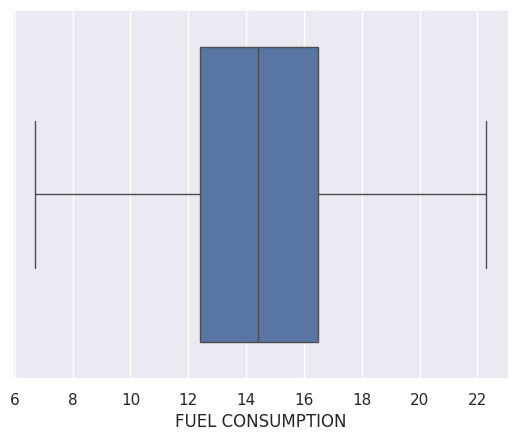

In [ ]:
sns.boxplot(x = data['FUEL CONSUMPTION'])
print(data.shape)

**Statistics and Data visualization**

Text(0.5, 1.0, 'DISTRIBUTION OF FUEL CONSUMPTION')

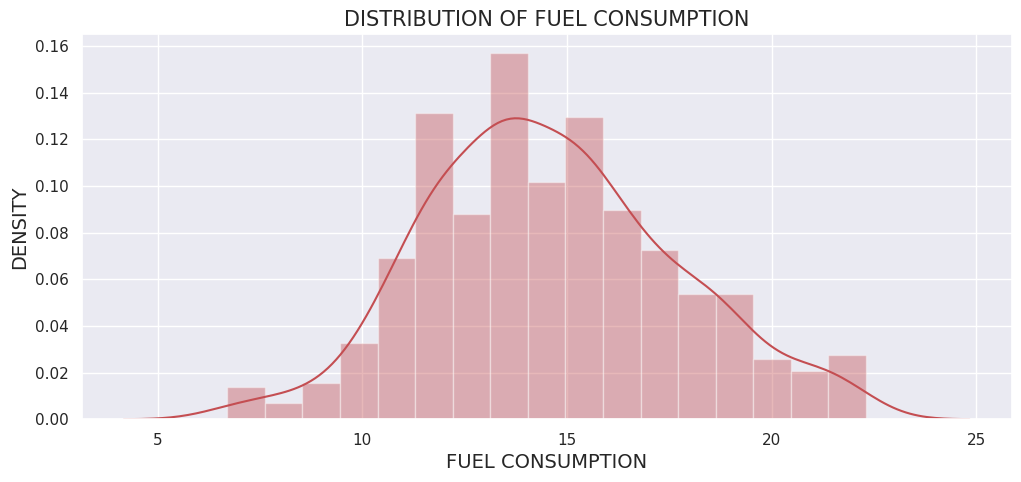

In [ ]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'FUEL CONSUMPTION' column of the data DataFrame
sns.distplot(data['FUEL CONSUMPTION'],color=('r'))

# Add labels to the x-axis and y-axis
plt.xlabel('FUEL CONSUMPTION', fontsize=14)
plt.ylabel('DENSITY', fontsize=14)

# Add a title to the plot
plt.title('DISTRIBUTION OF FUEL CONSUMPTION',fontsize=15)

In [ ]:
# # Separate numeric and categorical columns
# numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = data.select_dtypes(
#     include=['object', 'bool', 'datetime64[ns]']).columns

# # Create a single figure for all boxplots
# plt.figure(figsize=(15, 10))

# # Plot boxplots for numeric columns
# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
#     sns.boxplot(x=data[col])
#     plt.title(f'Boxplot of {col}')

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the combined figure
# plt.show()

# # Print basic statistics for categorical columns
# print("\nBasic Statistics for Categorical Columns:")
# for col in categorical_cols:
#     print(f'\nColumn: {col}')
#     print(data[col].describe())



# Data Analysis

In [ ]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data_da = data[numeric_cols]

def lower_quartile(series):
    return series.quantile(0.25)

def upper_quartile(series):
    return series.quantile(0.75)

def variance(series):
    return series.var()

def standard_deviation(series):
    return series.std()

def coefficient_of_variation(series):
    return (series.std()/series.mean())

def covariance(df: pd.DataFrame):
    return df.cov()

def correlation(df: pd.DataFrame):
    return df.corr()

column_statistics = data_da.agg(['mean','min','max', lower_quartile, 'median', upper_quartile, variance, standard_deviation, coefficient_of_variation])
column_statistics

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
mean,2000.0,3.250555,5.754358,14.599366,294.790808
min,2000.0,1.000000,3.000000,6.700000,147.000000
max,2000.0,8.000000,12.000000,22.300000,458.000000
lower_quartile,2000.0,2.200000,4.000000,12.400000,253.000000
median,2000.0,3.000000,6.000000,14.400000,288.000000
upper_quartile,2000.0,4.300000,6.000000,16.500000,339.000000
variance,0.0,1.486281,2.341152,9.351523,3781.467280
standard_deviation,0.0,1.219131,1.530082,3.058026,61.493636
coefficient_of_variation,0.0,0.375053,0.265900,0.209463,0.208601


**Correlation and Relationship Between Variables**

In [ ]:
data_da
corr_matrix = data_da.corr().round(1)
corr_matrix

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
Year,NaN,NaN,NaN,NaN,NaN
ENGINE SIZE,NaN,1.0,0.9,0.9,0.9
CYLINDERS,NaN,0.9,1.0,0.8,0.8
FUEL CONSUMPTION,NaN,0.9,0.8,1.0,1.0
COEMISSIONS,NaN,0.9,0.8,1.0,1.0


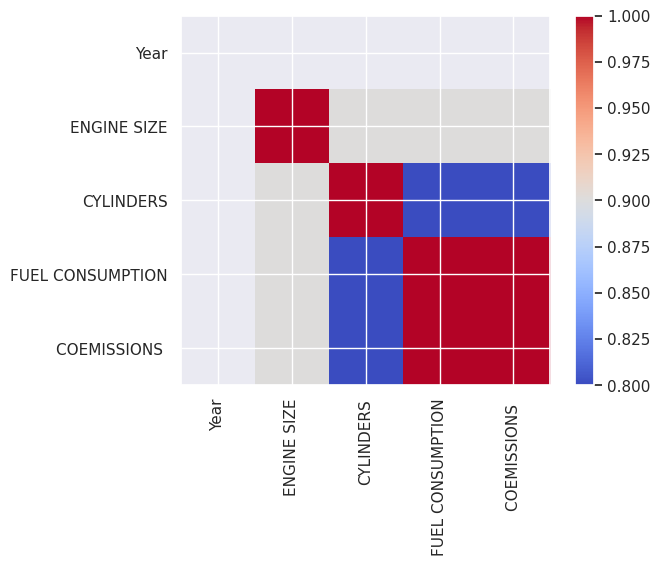

In [ ]:
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.index)), corr_matrix.index)

plt.show()

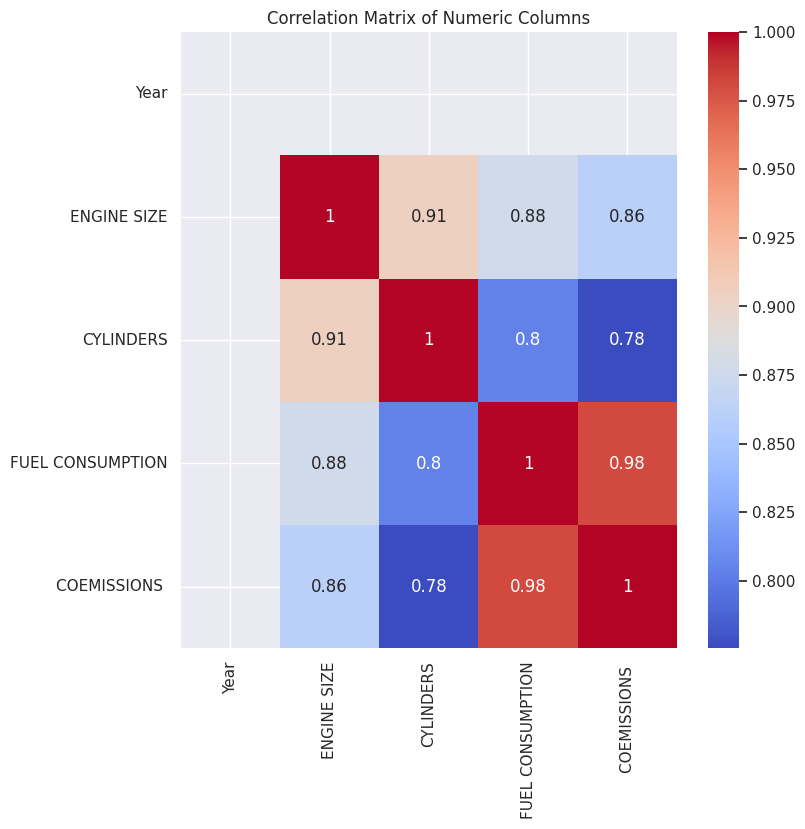

In [ ]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_cols.corr(),
            annot=True,
            cmap='coolwarm',
            cbar=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


# Hypothesis Testing

In [ ]:
# Define the null hypothesis
# H0: \mu = 14.713615  # Null hypothesis mean
# H1: \mu > 14.713615"  # Alternative hypothesis mean
mean = 14.713615

# Set the significance level
alpha = 0.05

# Ensure 'FUEL CONSUMPTION' column is numeric
data['FUEL CONSUMPTION'] = pd.to_numeric(data['FUEL CONSUMPTION'])

# Calculate the test statistic and p-value for fuel consumption
test_statistic, p_value = ttest_1samp(data['FUEL CONSUMPTION'], mean)

# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Test Statistic: -0.938481204436806
P-value: 0.3483568207298672
Fail to reject the null hypothesis. There is no significant difference.


In [ ]:
features = ['ENGINE SIZE','CYLINDERS', 'COEMISSIONS']
target = data['FUEL CONSUMPTION'].values

# Linear Regression

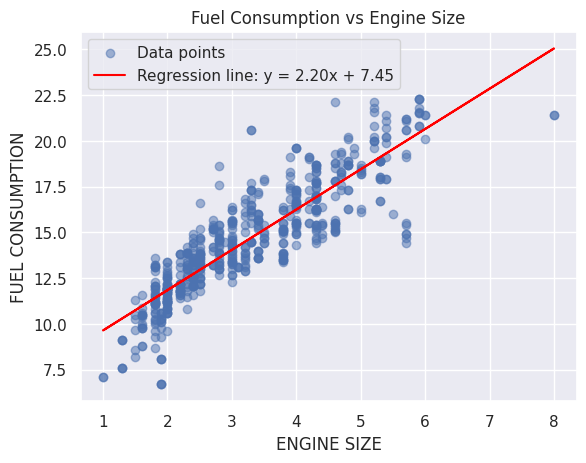

Regression Line: y = 2.1991820953120005 * x + 7.450804444224346
The impact on future fuel consumption if engine sizes increase
Engine size: 10, Predicted fuel consumption: 29.44
Engine size: 11, Predicted fuel consumption: 31.64
Engine size: 12, Predicted fuel consumption: 33.84
Engine size: 13, Predicted fuel consumption: 36.04
Engine size: 14, Predicted fuel consumption: 38.24
Engine size: 15, Predicted fuel consumption: 40.44
Engine size: 16, Predicted fuel consumption: 42.64
Engine size: 17, Predicted fuel consumption: 44.84
Engine size: 18, Predicted fuel consumption: 47.04
Engine size: 19, Predicted fuel consumption: 49.24


In [ ]:
# Assuming 'data' is a pandas DataFrame with columns 'ENGINE SIZE' and 'FUEL CONSUMPTION'
def plotting_data(data):
    x = data['ENGINE SIZE']
    y = data['FUEL CONSUMPTION']
    return x, y

# Extract the data for regression
x, y = plotting_data(data)

# Perform linear regression using numpy.polyfit
m, b = np.polyfit(x, y, 1)

# Plot the data points
plt.scatter(x, y, alpha=0.5, label='Data points')

# Plot the regression line
plt.plot(x, m * x + b, color='red', label=f'Regression line: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('ENGINE SIZE')
plt.ylabel('FUEL CONSUMPTION')
plt.legend()
plt.title('Fuel Consumption vs Engine Size')
plt.show()

print('Regression Line: y =', m, '* x +', b)

# Prediction
print('The impact on future fuel consumption if engine sizes increase')
future_engine_sizes = np.arange(10, 20)  # Example future engine sizes
predict_consumption = m * future_engine_sizes + b

for i, pred in zip(future_engine_sizes, predict_consumption):
    print(f'Engine size: {i}, Predicted fuel consumption: {pred:.2f}')

# Multiple Linear Regression

In [ ]:
le = LabelEncoder()
data['VEHICLE CLASS'] = le.fit_transform(data['VEHICLE CLASS'])
data['TRANSMISSION'] = le.fit_transform(data['TRANSMISSION'])
data['FUEL'] = le.fit_transform(data['FUEL'])

In [ ]:
print(data.columns)


Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')


In [ ]:
# Selecting features and target variable
X = data[["MAKE", "MODEL", "VEHICLE CLASS", "ENGINE SIZE", "CYLINDERS", "TRANSMISSION", "FUEL"]]
y = data['FUEL CONSUMPTION']
X.head(2)
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=["MAKE", "MODEL", "VEHICLE CLASS", "TRANSMISSION", "FUEL"], drop_first=True)   #one-hot encoding method

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (504, 381) (504,)
Test set: (127, 381) (127,)


In [ ]:
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  60852116196.72928
The Coefficients of mutiple linear regression model is:  [ 1.32746503e+00  3.84074711e-02  2.44250425e+11  2.12692237e+10
  2.17745296e+10 -3.23456185e+11  4.68601674e+10  4.45803672e+10
  1.94539643e+10  1.03163198e+11 -1.64154385e+08 -2.60553758e+10
 -7.91377759e+10  6.17767138e+10  7.83283636e+11  1.01609340e+11
 -1.25961614e+11 -4.78102660e+10  1.69178021e+11  1.10198176e+11
 -7.73159452e+09 -1.96644455e+10 -4.53699838e+10  1.48141240e+10
 -2.24915513e+10 -6.94829866e+10 -4.05710406e+11 -6.67936735e+10
  1.33542705e+10 -6.87035489e+10 -1.96644455e+10  3.56645905e+11
  4.27384530e+10  1.47827776e+10  7.50938897e+09  3.92000460e+10
  1.05131074e+10 -1.50228148e+10 -6.42863285e+10 -2.12692237e+10
 -2.12692237e+10 -2.12692237e+10 -2.12692237e+10 -2.12692237e+10
  2.03862984e+10 -2.12692237e+10  2.95862538e+10 -2.12692237e+10
  2.95862538e+10  5.58830912e+10 -1.07561163e+10 -4.09751849e+10
 -4.09751849e

In [ ]:
Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 46346377047.47717
Mean Squared Error(MSE) of Multiple Linear regression: 1.39825498166613e+22
Root Mean Squared Error (RMSE) of Multiple Linear regression: 118247832185.88535
Variance score of Multiple Linear regression: 0.98
Explained Variance Score (EVS) of Multiple Linear regression: -1.4146176604672882e+21
Residual sum of squares of Multiple Linear regression: 13982549816661300477952.00
R2 of Multiple Linear regression: -1.4202935272455704e+21
R2 rounded of Multiple Linear regression: -1.4202935272455704e+21
Adjusted_r2 of Multiple Linear regression:  7.017920958154584e+20
Accuracy of Multiple Linear regression: -1.4202935272455704e+21


In [ ]:
X = data[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS','COEMISSIONS ', 'FUEL']]
y = data[['FUEL CONSUMPTION']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       FUEL CONSUMPTION   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2775.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:37:56   Log-Likelihood:                -427.00
No. Observations:                 504   AIC:                             866.0
Df Residuals:                     498   BIC:                             891.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4509      0.205      2.201

In [ ]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 71.39585
Feature: 5, Score: 59.18465
Feature: 6, Score: 53.33382
Feature: 7, Score: 37.60389
Feature: 8, Score: 3.35810
Feature: 9, Score: -0.00000


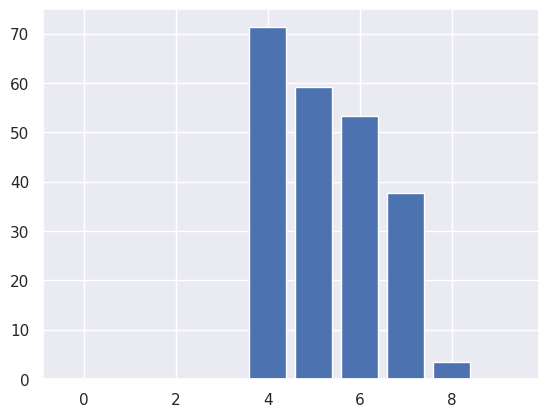

In [ ]:
# define dataset
X, y = make_regression(n_samples=10000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: ENGINE SIZE, Score: 0.23530
Feature: CYLINDERS, Score: -0.01511
Feature: COEMISSIONS , Score: 0.04812
Feature: VEHICLE CLASS_0, Score: 0.20315
Feature: VEHICLE CLASS_1, Score: 0.33687
Feature: VEHICLE CLASS_2, Score: 0.21105
Feature: VEHICLE CLASS_3, Score: 0.30080
Feature: VEHICLE CLASS_4, Score: 0.13915
Feature: VEHICLE CLASS_5, Score: 0.01470
Feature: VEHICLE CLASS_6, Score: -0.46435
Feature: VEHICLE CLASS_7, Score: 0.20184
Feature: VEHICLE CLASS_8, Score: 0.18069
Feature: VEHICLE CLASS_9, Score: 0.11075
Feature: VEHICLE CLASS_10, Score: -0.49257
Feature: VEHICLE CLASS_11, Score: 0.27246
Feature: VEHICLE CLASS_12, Score: -0.47451
Feature: VEHICLE CLASS_13, Score: -0.54003
Feature: FUEL_0, Score: -2.76004
Feature: FUEL_1, Score: 5.16805
Feature: FUEL_3, Score: -1.21195
Feature: FUEL_4, Score: -1.19606


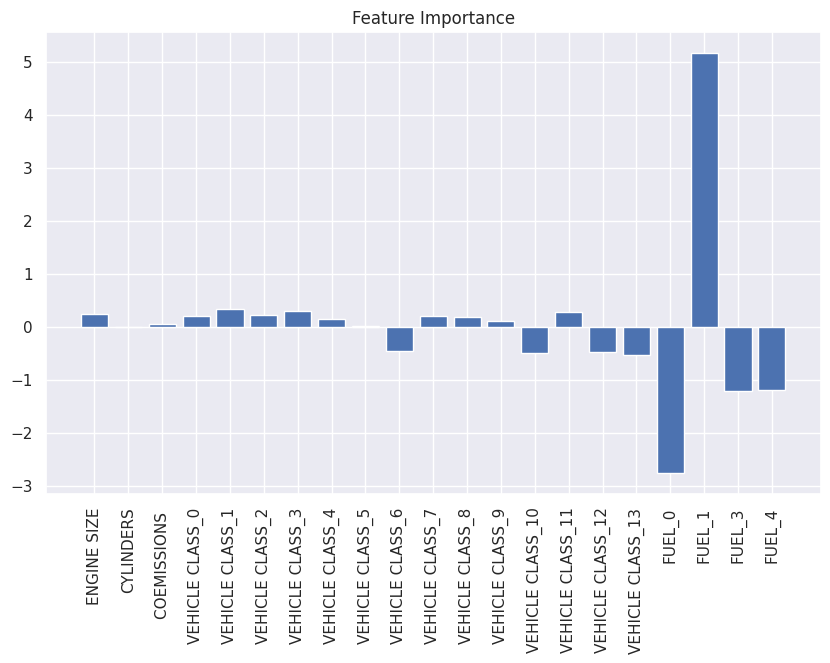

In [ ]:
# Define the features and target variable
X = data[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS ', 'FUEL']]
y = data['FUEL CONSUMPTION']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer to handle categorical variables
categorical_features = ['VEHICLE CLASS', 'FUEL']
numeric_features = ['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS ']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define and fit the model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Get feature names
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, encoded_feature_names])

# Get importance (coefficients)
importance = model.coef_

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {feature_names[i]}, Score: {v:.5f}')

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(importance)), labels=feature_names, rotation=90)
plt.title('Feature Importance')
plt.show()


Feature: VEHICLE CLASS, Score: -0.03201
Feature: ENGINE SIZE, Score: 0.22265
Feature: CYLINDERS, Score: 0.07057
Feature: C2EMISSIONS , Score: 0.04430
Feature: FUEL, Score: 0.10300


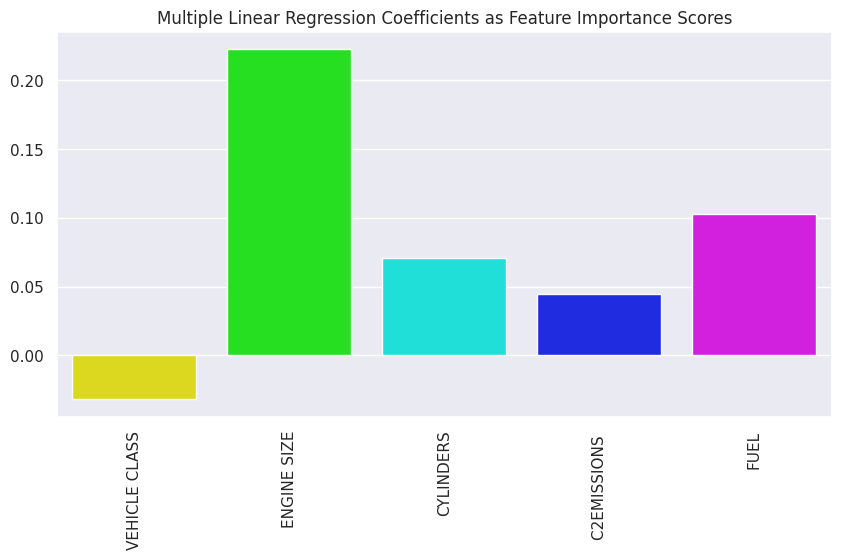

In [ ]:
# Encode categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['VEHICLE CLASS'] = le.fit_transform(data['VEHICLE CLASS'])
data['TRANSMISSION'] = le.fit_transform(data['TRANSMISSION'])
data['FUEL'] = le.fit_transform(data['FUEL'])

# Define the features and target variable
X = data[['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS ', 'FUEL']]
y = data['FUEL CONSUMPTION']

# Define feature names
feature_names = ['VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'C2EMISSIONS ', 'FUEL']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get importance (coefficients)
importance = model.coef_

# Summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {feature_names[i]}, Score: {v:.5f}')

# Plot feature importance using Seaborn
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.barplot(x=feature_names, y=importance, palette='hsv')
ax.set_title('Multiple Linear Regression Coefficients as Feature Importance Scores')
plot.set_xticklabels(plot.get_xticklabels(), rotation='vertical')
plt.show()

In [ ]:
# Sorting feature_importance values in descending order
FeatureImportance = pd.DataFrame({'Features': X.columns, 'feature_importances': model.coef_})
FeatureImportance = FeatureImportance.sort_values(by = 'feature_importances', ascending = False)
FeatureImportance

,Features,feature_importances
1,ENGINE SIZE,0.222648
4,FUEL,0.103000
2,CYLINDERS,0.070566
3,COEMISSIONS,0.044297
0,VEHICLE CLASS,-0.032006


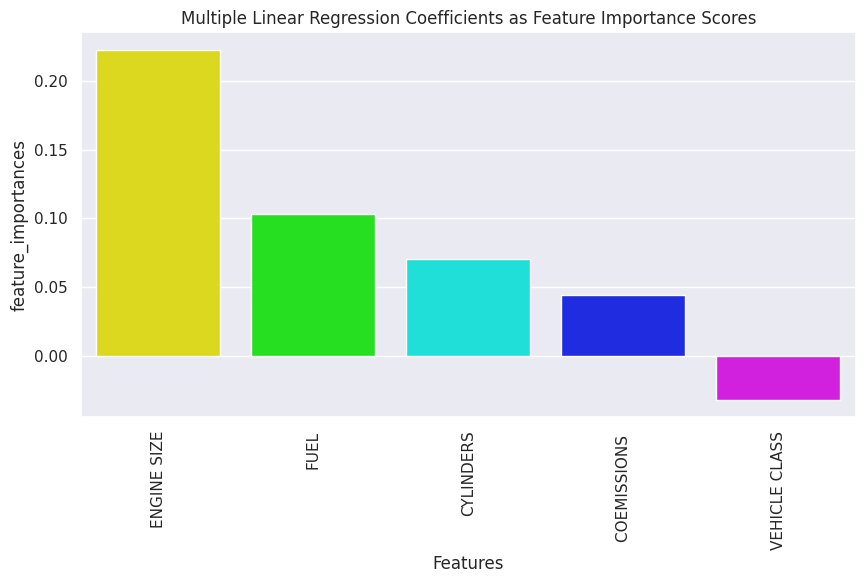

In [ ]:
FeatureImportance = FeatureImportance.sort_values(by = 'feature_importances', ascending = False)
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x='Features', y='feature_importances', data = FeatureImportance, palette = 'hsv')
ax.set_title('Multiple Linear Regression Coefficients as Feature Importance Scores')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()

In [ ]:
#The value of the intercept (a)
print('The value of the intercept of mutiple linear regression model is: ', mlm.intercept_)
# The coefficients
print ('The Coefficients of mutiple linear regression model is: ', mlm.coef_)

The value of the intercept of mutiple linear regression model is:  [0.45093614]
The Coefficients of mutiple linear regression model is:  [[-0.02469792  0.17915798  0.10302319  0.04420598  0.02872533]]


In [ ]:
X = data[[ 'ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS ', 'FUEL']]
y = data['FUEL CONSUMPTION']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)


Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 0.32342596874667484
Mean Squared Error(MSE) of Multiple Linear regression: 0.17420658117869417
Root Mean Squared Error (RMSE) of Multiple Linear regression: 0.4173806190741182
Variance score of Multiple Linear regression: 0.96
Explained Variance Score (EVS) of Multiple Linear regression: 0.982418748464088
Residual sum of squares of Multiple Linear regression: 0.17
R2 of Multiple Linear regression: 0.9823047668060618
R2 rounded of Multiple Linear regression: 0.98
Adjusted_r2 of Multiple Linear regression:  0.982
Accuracy of Multiple Linear regression: 0.9823047668060618


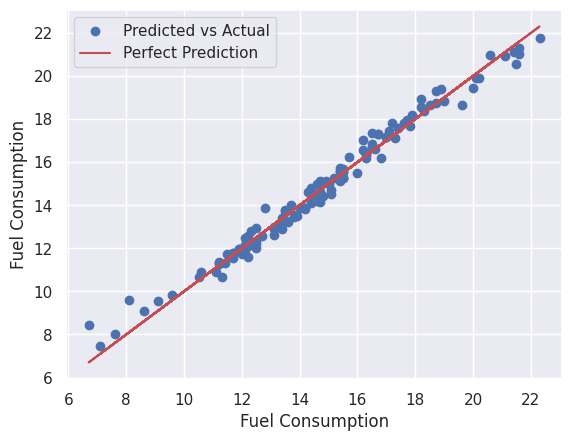

In [ ]:
# Final predictions
plt.scatter(y_test, Yhat_mlm, label="Predicted vs Actual")

# Perfect predictions
plt.xlabel('Fuel Consumption')
plt.ylabel('Fuel Consumption')
plt.plot(y_test,y_test,'r', label="Perfect Prediction")
plt.legend();